python -m spacy download en_core_web_smData Generation

Data was generated in 2 steps:

1.Initial Data was captured internally via Google Form which asked users for car issues they currently have or had in the past
Classified that data into: brakes, starter, other

2.Took this 'training set' and used Markovify to generate more data for our tutorial

In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 280 kB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 722 kB 99.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 97.9 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 110.2 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 108.5 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 103.2 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 89.4 MB/s  eta 0:00:01
     |████████████████████████████████| 9.2 MB 100.4 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 101.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 100.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 99.1 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 93.0 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 97.4 MB/s eta 0:00:01
  Created wheel for markovify: filename=markovify-0.9.0-py3-none-any.whl size=18474 sha256=b80277

In [2]:
import pandas as pd
100
df = pd.read_csv('response.csv') 
df = df.fillna('')
df['response']=df.iloc[:,3]+df.iloc[:,5]+df.iloc[:,6]
df['issue'] = df.iloc[:,1]
df['symptom'] = df.iloc[:,2] + df.iloc[:,4]
subset = df.iloc[:,-3:]
subset

,response,issue,symptom
0,my brakes make a noise whenever I try to stop,Brakes,Car makes grinding noise
1,super frustrating every time I start my car it...,Starter,Car starts then stops
2,I can't open the damn door to my car,Other,
3,I turn the key and nothing happens,Starter,Car doesn't start
4,Car doesn't always start when it's low on blin...,Starter,Car doesn't start
...,...,...,...
104,my breaks are faulty.,Brakes,"Car brakes, but then brakes disengage"
105,my lights do not work,Other,
106,I try to start the engine only to find that th...,Starter,Car doesn't start
107,The driver side window auto function does not ...,Other,


In [3]:
import markovify
import codecs

In [4]:
#markovify is a simple, extensible Markov chain generator
#Its primary use is for building Markov models of large corpora of text and generating random sentences from that.


#Function builds the model according to what issue (e.g. brakes, starter, other) is given
def train_markov_type(data, issue):
    return markovify.Text(data[data["issue"] == issue].response, retain_original=False, state_size=2)

#Function takes one of the 'issue' models and creates a randomly-generated sentence of length up to 200 characters.  Note only creates '1' sentence
def make_sentence(model, length=100):
    return model.make_short_sentence(length, max_overlap_ratio = .7, max_overlap_total=15)

#built models
other_model = train_markov_type(subset, "Other")
brakes_model = train_markov_type(subset, "Brakes")
starter_model = train_markov_type(subset, "Starter")

In [5]:
make_sentence(other_model)  #creates a sentence that should be an example of 'other' issue(category)

'The warning indicator light is out.'

In [6]:
make_sentence(brakes_model)  #creates a sentence that should be an example of 'brakes' issue(category)

'Then I have to press the brakes a bit harder than I normally would.'

In [7]:
make_sentence(starter_model)   #creates a sentence that should be an example of 'starter' issue(category)

'I have to press the ignition button at least twice before my car but it definitely was not starting.'

We can combine these models with relative weights

In [8]:
#create a compound model in which the sentences that come out will be 2x as many 'other' than 'brakes' or 'starters'

compound_model = markovify.combine([other_model, brakes_model, starter_model], [14, 7, 7])  

In [ ]:
#make 20 sentences out of the compound model - copy the text into a spreadsheet and check the count of the issues  (e.g. how many brake issue are there?)

for i in range(100):
    print(make_sentence(brakes_model))

In [10]:
import numpy

def generate_cases(models, weights=None):
    if weights is None:
        weights = [1] * len(models)
    
    choices = []
    
    total_weight = float(sum(weights))
    
    for i in range(len(weights)):
        choices.append((float(sum(weights[0:i+1])) / total_weight, models[i]))
    
    def choose_model():
        r = numpy.random.uniform()
        for (p, m) in choices:
            if r <= p:
                return m
        return choices[-1][1]


    def choose_from(c):
        idx = math.floor(numpy.random.uniform() * len(c))
        return c[idx]
    
    
    while True:
        yield (make_sentence(choose_model()))
            

In [11]:
#compound_model = markovify.combine([other_model, brakes_model, starter_model], [14, 7, 7])  

t = generate_cases([other_model, brakes_model, starter_model], [3,4,4])  #actual sentences



In [15]:


[next(t) for i in range(10)]  #create 100 sentences



['Just that odd clicking noise....',
 "This is the third one, and I can't get up to 88 MPH",
 'Then I have to brake again.',
 'I have some noise when i drive it above 60 mph',
 'I feel a bit of rumbling to the car made horrible grinding noises.',
 'It sputters for a very long time to start, and if I push the key and nothing happens',
 "I think my car if the door won't open.",
 'My car does not start.',
 "Car dies when I stop at a light or stop sign and then won't start again.",
 'Maybe the brakes disengage.']

In [ ]:
#write sentences to CSV file 
print(list)



Checking for similarity (slow)

In [ ]:
#https://stackoverflow.com/questions/54334304/spacy-cant-find-model-en-core-web-sm-on-windows-10-and-python-3-5-3-anacon
#in your terminal window, execute the following code, before loading 'en_core_web_sm':

#     cd vehicle-claims-processing/
#     python -m spacy download en_core_web_sm


In [13]:
#spacy is a free open-source library for NLP in python
#en_core_web_sm is an english pipeline optimized for cpu.  components: tok2vec, tagger, prser, senter, ner, attribure_rulter, lemmantizer
#load english tokenizer, tagger, parser and NER
#load english tokenizer, tagger, parser and NER

import spacy

<ipython-input-14-30e49a711081>:14: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if m < doc.similarity(doc1):
<ipython-input-14-30e49a711081>:15: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models i

Mean similarity: 0.8125149986037026
[0.8393195439119241, 0.8451555708947686, 0.8280475410952531, 0.671093154854383, 1.0, 0.876784986485434, 0.6619173085767404, 1.0, 1.0, 0.857301763395154, 0.548411552826165, 0.9299268821306551, 0.7698688657444562, 1.0, 0.7825631570988464, 0.6417640723577596, 0.5582718161907415, 0.3136168095685487, 0.7328827513175139, 1.0, 0.7341716024427714, 1.0, 1.0, 0.7971669406663372, 0.671556830276128, 0.5677476852512697, 0.6076775201447694, 1.0, 0.5644226629695164, 0.7077358889264597, 0.8518026948057146, 1.0, 0.6064920154782988, 0.7739907002074002, 1.0, 0.7041479208744454, 0.9025749334899409, 1.0, 0.5757656850495764, 0.8043378292358959, 1.0, 0.8004870946977029, 1.0, 0.7971669406663372, 0.7852978743723277, 0.8206557446158871, 0.8107326633893506, 0.7128111958192636, 0.8146783402506725, 0.7151699003077256, 0.8021649162574365, 0.7494423615817143, 1.0, 1.0, 0.5707095176683428, 0.638484595237507, 0.8515417569063928, 0.8419749711125252, 0.7534710753140295, 1.0, 1.0, 0.88

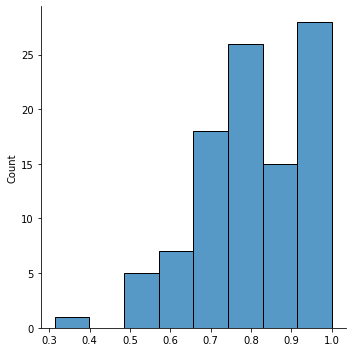

In [14]:
#load english tokenizer, tagger, parser and NER
nlp = spacy.load('en_core_web_sm')  #the nlp is going to tokenize the lists dt_b, dt_a

dt_b = subset["response"]  #109 responses (from our google form) in our response.csv
dt_a = [next(t) for i in range(100)]  #created sentences from 3 models that were combined.  Remember the 3 models were (created) based on the the reponse.csv issues (categories)

import numpy as np
a = []
for sentence in dt_a:
    doc = nlp(sentence)
    m = 0
    for sentence1 in dt_b:
        doc1 = nlp(sentence1)
        if m < doc.similarity(doc1):
            m = doc.similarity(doc1)  #m is taking the highest similarity of all the comparisons made  (a[] is a bunch of numbers between 1 and -1)
    a.append(m)
        
print("Mean similarity: " + str(np.array(a).mean()))
print(a)

import seaborn as sns
sns.displot(a)

#plotting generated sentences vs google form sentences.  For each google form sentence, what was the most similiar in the list of generated sentences.
#have a fairly normal distributation which demonstrates that our nlp generation isn't bad :)

In [ ]:
import cProfile

def timing(c):
    for _ in range(c):
        next(t)

cProfile.run('timing(2000)', 'generatestats')

In [ ]:
import pstats
p = pstats.Stats('generatestats')
p.strip_dirs().sort_stats(-1).print_stats()